# The Sparks Foundation:Data Science and Business Analytics Internship

# Task6:Prediction Using Decision Tree Algorithm
    
Create the decision tree classifier and visualise it graphically.The purpose is if we feed any new data to this classifier
it would be able to predict the rightclass accordingly

Author:Sanyami Naik

### 1)Importing the libraries required

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2)Exploring the data needed

In [2]:
dataset = pd.read_csv("Iris.csv")
print("Data imported sucessfully")
dataset.head()

Data imported sucessfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
dataset.shape

(150, 6)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### 3)Species Analysis

In [7]:
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

So we have in total three types of species n the given dataset.

Iris-Setosa,Iris-Versicolor,Iris-Virginica

In [8]:
dataset['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

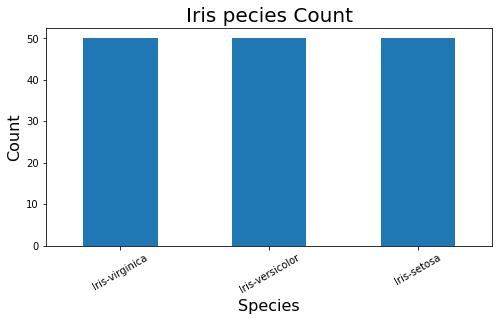

In [9]:
dataset['Species'].value_counts().plot(kind='bar',figsize=(8,4))
plt.title("Iris pecies Count",fontsize=20)
plt.xlabel('Species',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.xticks(rotation=30)
plt.show()


Analysis showsthat every species is equal to the number ie 50.

So dataset can be called as a BALANCED SET

<AxesSubplot:>

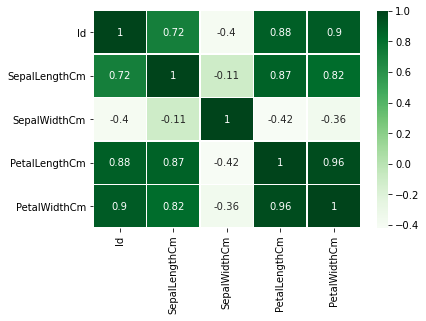

In [10]:
sns.heatmap(dataset.corr(),cmap='Greens',annot=True,linewidth=0.5)

### 4)Data Splitting

In [11]:
X = dataset.iloc[:, 1:5].values
y = dataset.iloc[:, 5].values

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.2, random_state = 42)

### 5)Creating Decision Tree Classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
model = DecisionTreeClassifier()
model.fit(X_train ,y_train)

DecisionTreeClassifier()

In [15]:
print('Accuracy of training set: ',model.score(X_train,y_train))

Accuracy of training set:  1.0


In [16]:
y_pred=model.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [17]:
from sklearn import metrics

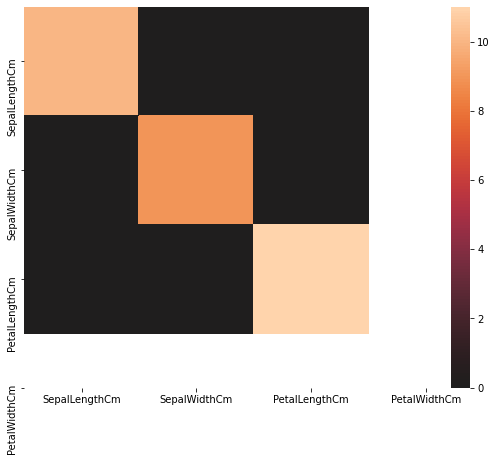

In [18]:
plt.figure(figsize= (9,7))
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),xticklabels= dataset.iloc[:, 1:5].columns.values,yticklabels= dataset.iloc[:, 1:5].columns.values,center= 0)
plt.show()

In [19]:
print(f"Precision: {metrics.precision_score(y_test,y_pred,average = 'macro')}")
print(f"Recall: {metrics.recall_score(y_test,y_pred,average = 'macro')}")
print(f"F1: {metrics.f1_score(y_test,y_pred,average = 'macro')}")

Precision: 1.0
Recall: 1.0
F1: 1.0


### 6)Decision Tree Visualization

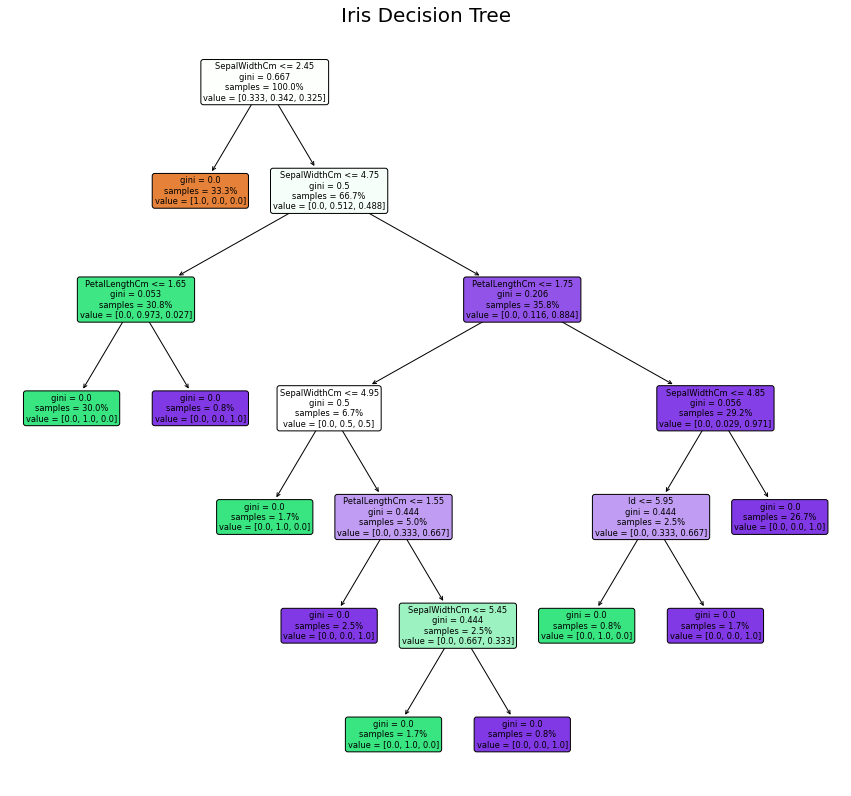

In [20]:
from sklearn import tree

plt.figure(figsize=(15,14))
tree.plot_tree(model,feature_names= dataset.iloc[: 1:5].columns.values, 
               filled = True , precision= 3,proportion =True, rounded = True)
plt.title("Iris Decision Tree",fontsize=20)
plt.show()

### 7)Predict the aprropriate class for new data

In [21]:
test1 = [[6.3,2.5,4.9,2.4]] 
test2 = [[5.1,3.5,1.4,1.2]] 
test3 = [[1.0,0.3,0.3,0.2]] 

print('Class for the test1 data is- ',model.predict(test1))
print('Class for the test2 data is- ',model.predict(test2))
print('Class for the test3 data is- ',model.predict(test3))

Class for the test1 data is-  ['Iris-virginica']
Class for the test2 data is-  ['Iris-setosa']
Class for the test3 data is-  ['Iris-setosa']


# THANKYOUU